In [ ]:
pip install lasio

In [ ]:
#inv model based
import numpy as np
import matplotlib.pyplot as plt
import lasio

In [ ]:
las1 = lasio.read('/content/NTN1.las.txt')
NTN1 = las1.df()
NTN1

,RSFL,RTS,RTD,RILD,ILD,CAL,GR,DT,SP,SP1,...,DEN,NPHI,RHOB,LITHOFACIES,FLUVIALFACIES,GENERALTIME1,BS,MLL,TEMP,COAL
DEPT,,,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516.0,NaN,NaN,NaN,NaN,55.8746,NaN,38.85,82.14,-9.94,2.92,...,NaN,NaN,NaN,NaN,NaN,1061.59,12.25,NaN,324.65,NaN
2517.0,NaN,NaN,NaN,NaN,1.0083,NaN,0.27,77.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1061.93,12.25,NaN,324.75,NaN
2518.0,NaN,NaN,NaN,NaN,1.0070,NaN,0.16,77.26,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1062.27,12.25,NaN,324.86,NaN


In [ ]:
#add dens
dens = NTN1['DEN']
dens_ = np.array(dens)
dens_1 = np.zeros((len(dens_), 1), float)
for i in range(0, len(dens_1)):
  dens_1[i] = dens_[i]
  if dens_[i] >= 0:
    dens_1[i] = dens[i]
  elif dens_[i] <= 0:
    dens_1[i] = dens[i]
  else:
    dens_1[i] = 0

#add vp
vp = 1/(NTN1['DT'])*304800
vp_ = np.array(vp)
vp_1 = np.zeros((len(vp_), 1), float)
for i in range(0, len(vp_)):
  vp_1[i] = vp_[i]
  if vp_[i] >= 0:
    vp_1[i] = vp_[i]
  elif vp_[i] <= 0:
    vp_1[i] = vp_[i]
  else:
    vp_1[i] = 0
# rho = dens_1[:,1]; vel=vp_1[:,1]
ai = dens_1*vp_1

print(dens_1.shape)
print(vp_1.shape)
print(ai.shape)

(2521, 1)
(2521, 1)
(2521, 1)


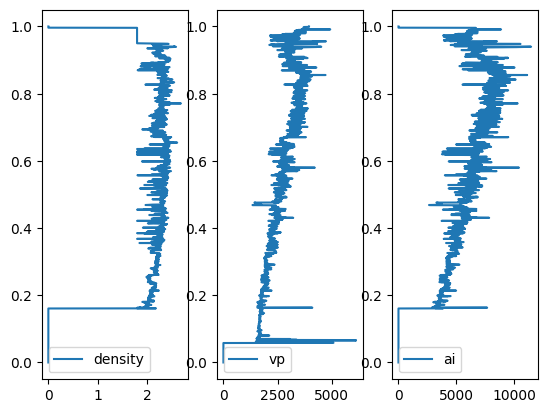

In [ ]:
time = np.linspace(0, 1, len(dens_1))
plt.subplot(1,3,1)
plt.plot(dens_1,time, label = 'density')
plt.legend()
plt.subplot(1,3,2)
plt.plot( vp_1, time, label = "vp")
plt.legend()
plt.subplot(1,3,3)
plt.plot( ai, time, label = 'ai')
plt.legend()

/tmp/ipython-input-16-4107273872.py:4: RuntimeWarning: invalid value encountered in divide
  kr[i] = (ai[i+1]-ai[i])/(ai[i]+ai[i+1])


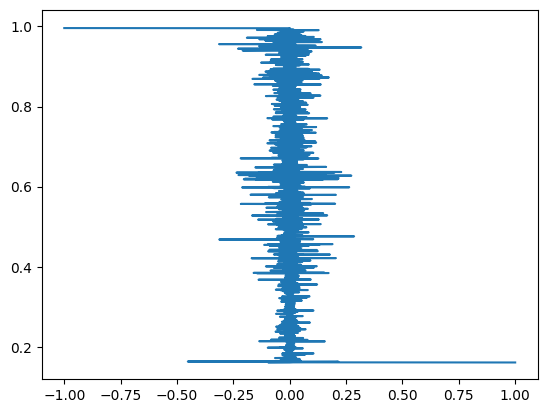

In [ ]:
#koef ref
kr = np.zeros((len(ai), 1), float)
for i in range (0, len(ai)-1):
  kr[i] = (ai[i+1]-ai[i])/(ai[i]+ai[i+1])
plt.plot(kr, time)

(1177, 1)


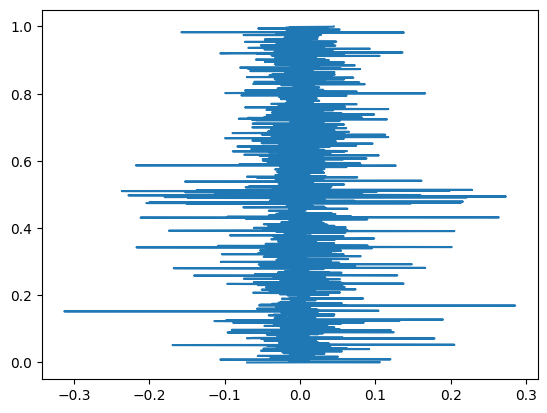

In [ ]:
kr_ = kr[1000:2177]
print(kr_.shape)
time = np.linspace(0, 1, len(kr_))
plt.plot(kr_, time)

(1177, 1177)


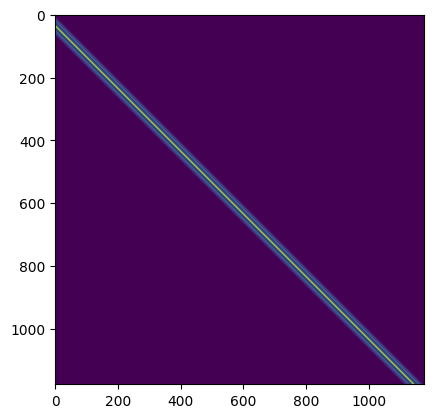

In [ ]:
G1 = np.genfromtxt('/content/cm.txt')
G1_ = G1[0:1500, 0:1500]
print(G1.shape)
plt.imshow(G1)

In [ ]:
tr = np.genfromtxt('/content/seismicnatuna(ntn1).txt')
print(tr.shape)

(1177,)


In [ ]:
m1 = np.dot(G1, G1.T)
alfa = 0.3
alfai = np.eye(len(tr))*alfa
m2 = np.linalg.inv(m1+alfai)
m3 = np.dot(G1.T, m2)

tr_ = tr.reshape(len(tr),1)


m = np.dot(m3, tr_)
print(m.shape)

(1177, 1)


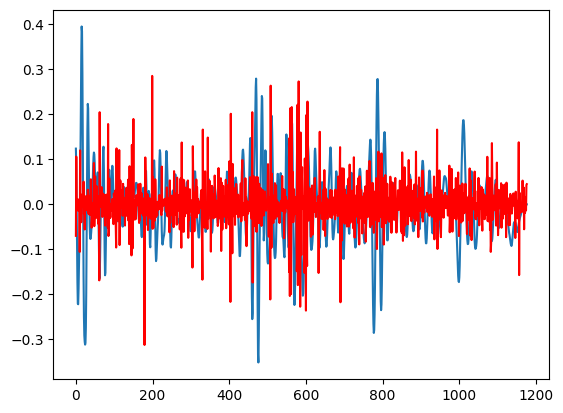

In [ ]:
plt.plot(m)
plt.plot(kr_, '-r')

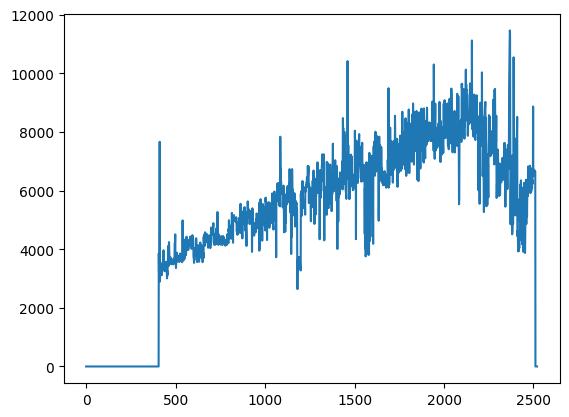

In [ ]:
plt.plot(ai)

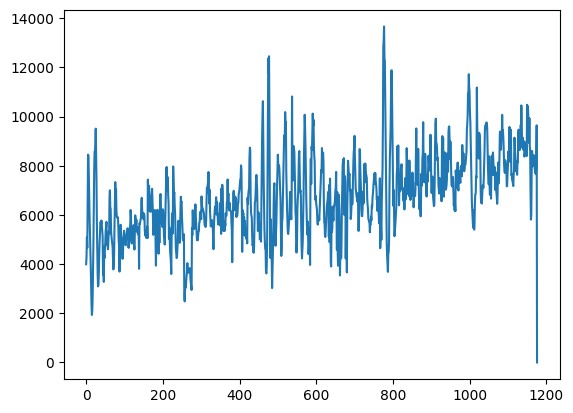

In [ ]:
ai_ = ai[923:2100]
aib = np.zeros((len(ai_),1),float)
for i in range (0, len(ai_)-1):
  aib[i] = (ai_[i+1] - m[i] * ai_[i+1])/(m[i]+1)

plt.plot(aib)

Validasi

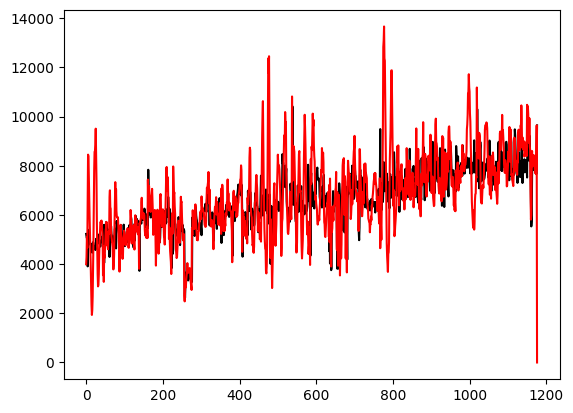

In [ ]:
plt.plot(ai[923:2100],'-k')
plt.plot(aib, '-r')

In [ ]:
aimbmanual1 = np.savetxt('aimbmanual1.txt', aib)

In [ ]:
las2 = lasio.read('/content/NTN2.las.txt')
NTN2 = las2.df()
NTN2

,DEPTH,DEPTH_MD,RTS,RTD,RILD,RSFL,NPHI,DEN,CAL,GR,DT,SP,SP1,LITHOFACIES,FLUVIALFACIES,GENERALTIME1,BS,TEMP,COAL
DEPT,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949.0,1949.0,6394.36,5.0620,5.7266,5.7266,5.06,0.1836,2.2326,17.04,149.61,81.26,-43.89,-2.34,NaN,NaN,902.99,12.25,324.62,NaN
1950.0,1950.0,6397.64,5.5478,5.7537,5.7537,5.55,0.1872,2.3714,10.33,149.98,81.41,-44.64,-3.35,NaN,NaN,903.36,12.25,324.75,NaN
1951.0,1951.0,6400.92,4.7488,5.3949,5.3949,4.75,0.1882,2.3125,8.00,148.21,81.10,-43.49,-2.46,NaN,NaN,903.74,12.25,324.88,NaN


In [ ]:
las3 = lasio.read('/content/NTN3.las.txt')
NTN3 = las3.df()
NTN3
las6 = lasio.read('/content/NTN6.las.txt')
NTN6 = las6.df()
NTN6

,DEPTH,DEPTH_MD,RTS,RTD,RILD,RSFL,NPHI,DEN,CAL,GR,DT,SP,SP1,LITHOFACIES,FLUVIALFACIES,GENERALTIME1,BS,TEMP,COAL
DEPT,,,,,,,,,,,,,,,,,,,
0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.17,NaN,NaN,NaN
1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.59,NaN,NaN,NaN
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.01,NaN,NaN,NaN
3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.43,NaN,NaN,NaN
4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.85,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982.0,1982.0,6502.63,7.4126,7.3720,7.3720,7.41,NaN,NaN,NaN,42.43,72.18,-11.55,-6.57,NaN,NaN,900.66,12.25,275.08,NaN
1983.0,1983.0,6505.91,6.2995,6.6811,6.6811,6.30,NaN,NaN,NaN,42.87,72.22,-14.01,-10.08,NaN,NaN,900.95,12.25,275.18,NaN
1984.0,1984.0,6509.19,4.2188,4.4481,4.4481,4.22,NaN,NaN,NaN,43.32,71.96,-12.58,-9.72,NaN,NaN,901.24,12.25,275.28,NaN


In [ ]:
#add dens
dens2 = NTN2['DEN']
dens2_ = np.array(dens2)
dens2_1 = np.zeros((len(dens2_), 1), float)
for i in range(0, len(dens2_1)):
  dens2_1[i] = dens2_[i]
  if dens2_[i] >= 0:
    dens2_1[i] = dens2[i]
  elif dens2_[i] <= 0:
    dens2_1[i] = dens2[i]
  else:
    dens2_1[i] = 0

#add vp
vp2 = 1/(NTN2['DT'])*304800
vp2_ = np.array(vp2)
vp2_1 = np.zeros((len(vp2_), 1), float)
for i in range(0, len(vp2_)):
  vp2_1[i] = vp2_[i]
  if vp2_[i] >= 0:
    vp2_1[i] = vp2_[i]
  elif vp2_[i] <= 0:
    vp2_1[i] = vp2_[i]
  else:
    vp2_1[i] = 0
# rho = dens_1[:,1]; vel=vp_1[:,1]
ai2 = dens2_1*vp2_1

print(dens2_.shape)
print(vp2_.shape)
print(ai2.shape)

(1954,)
(1954,)
(1954, 1)


In [ ]:
# NTN3
#add dens
dens3 = NTN3['DEN']
dens3_ = np.array(dens3)
dens3_1 = np.zeros((len(dens3_), 1), float)
for i in range(0, len(dens3_1)):
  dens3_1[i] = dens3_[i]
  if dens3_[i] >= 0:
    dens3_1[i] = dens3[i]
  elif dens3_[i] <= 0:
    dens3_1[i] = dens3[i]
  else:
    dens3_1[i] = 0

#add vp
vp3 = 1/(NTN3['DT'])*304800
vp3_ = np.array(vp3)
vp3_1 = np.zeros((len(vp3_), 1), float)
for i in range(0, len(vp3_)):
  vp3_1[i] = vp3_[i]
  if vp3_[i] >= 0:
    vp3_1[i] = vp3_[i]
  elif vp3_[i] <= 0:
    vp3_1[i] = vp3_[i]
  else:
    vp3_1[i] = 0
# rho = dens_1[:,1]; vel=vp_1[:,1]
ai3 = dens3_1*vp3_1

print(dens3_.shape)
print(vp3_.shape)
print(ai3.shape)

# NTN6
#add dens
dens6 = NTN6['DEN']
dens6_ = np.array(dens6)
dens6_1 = np.zeros((len(dens6_), 1), float)
for i in range(0, len(dens6_1)):
  dens6_1[i] = dens6_[i]
  if dens6_[i] >= 0:
    dens6_1[i] = dens6[i]
  elif dens6_[i] <= 0:
    dens6_1[i] = dens6[i]
  else:
    dens6_1[i] = 0

#add vp
vp6 = 1/(NTN6['DT'])*304800
vp6_ = np.array(vp6)
vp6_1 = np.zeros((len(vp6_), 1), float)
for i in range(0, len(vp6_)):
  vp6_1[i] = vp6_[i]
  if vp6_[i] >= 0:
    vp6_1[i] = vp6_[i]
  elif vp6_[i] <= 0:
    vp6_1[i] = vp6_[i]
  else:
    vp6_1[i] = 0
# rho = dens_1[:,1]; vel=vp_1[:,1]
ai6 = dens6_1*vp6_1

print(dens6_.shape)
print(vp6_.shape)
print(ai6.shape)

(1775,)
(1775,)
(1775, 1)
(1987,)
(1987,)
(1987, 1)


/tmp/ipython-input-30-1236112286.py:61: RuntimeWarning: invalid value encountered in divide
  kr2[i] = (ai2[i+1]-ai2[i])/(ai2[i]+ai2[i+1])
/tmp/ipython-input-30-1236112286.py:69: RuntimeWarning: invalid value encountered in divide
  kr3[i] = (ai3[i+1]-ai3[i])/(ai3[i]+ai3[i+1])
/tmp/ipython-input-30-1236112286.py:77: RuntimeWarning: invalid value encountered in divide
  kr6[i] = (ai6[i+1]-ai6[i])/(ai6[i]+ai6[i+1])


(1954, 1)
(1775, 1)
(1987, 1)


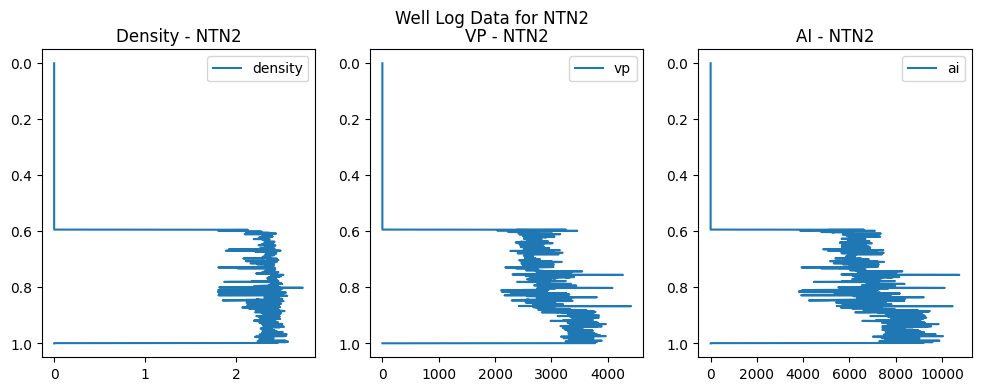

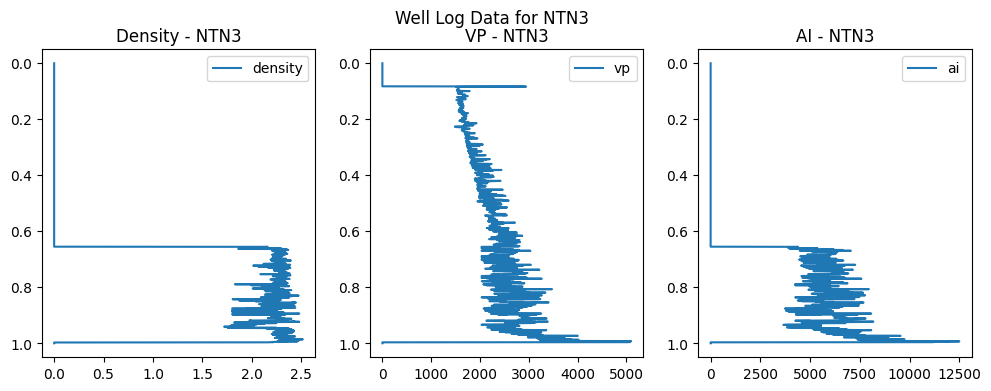

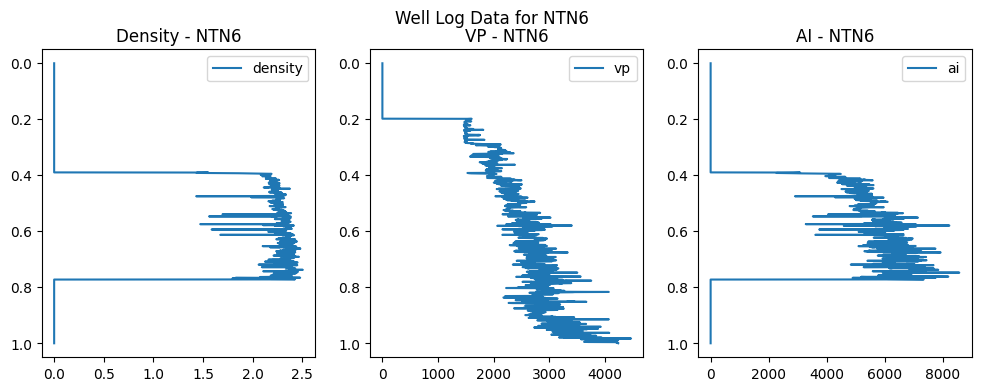

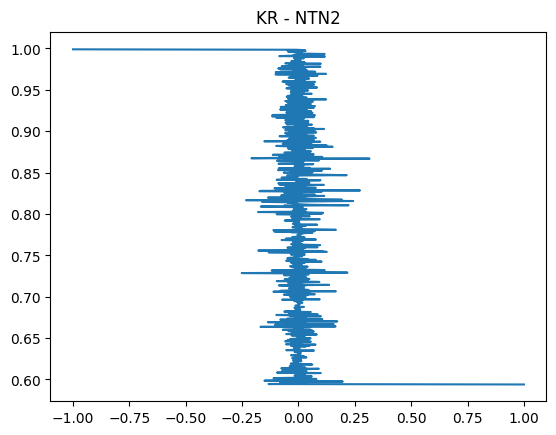

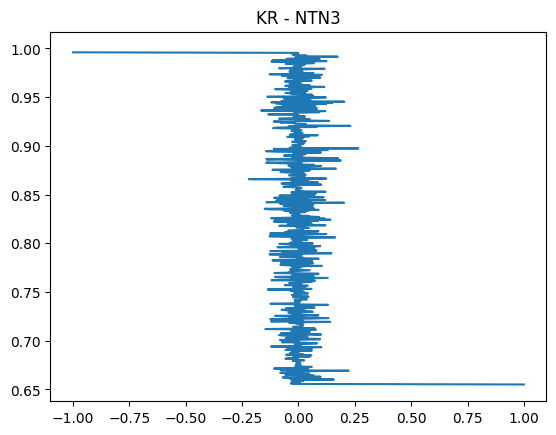

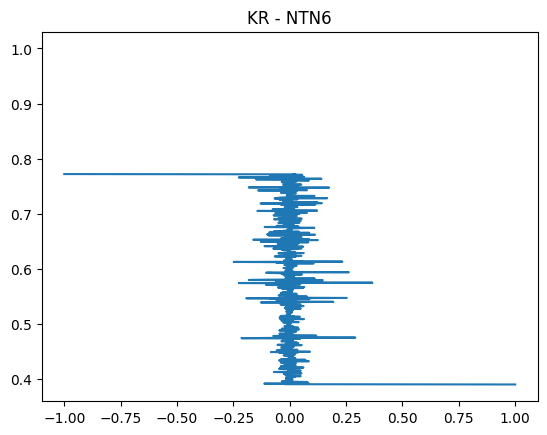

In [ ]:
time2 = np.linspace(0, 1, len(dens2_1))
plt.figure(figsize=(12, 4)) # Added figure size for better display
plt.subplot(1,3,1)
plt.plot(dens2_1,time2, label = 'density')
plt.title('Density - NTN2') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.subplot(1,3,2)
plt.plot( vp2_1, time2, label = "vp")
plt.title('VP - NTN2') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.subplot(1,3,3)
plt.plot( ai2, time2, label = 'ai')
plt.title('AI - NTN2') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.suptitle('Well Log Data for NTN2') # Added figure title

time3 = np.linspace(0, 1, len(dens3_1))
plt.figure(figsize=(12, 4)) # Added figure size for better display
plt.subplot(1,3,1)
plt.plot(dens3_1,time3, label = 'density')
plt.title('Density - NTN3') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.subplot(1,3,2)
plt.plot( vp3_1, time3, label = "vp")
plt.title('VP - NTN3') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.subplot(1,3,3)
plt.plot( ai3, time3, label = 'ai')
plt.title('AI - NTN3') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.suptitle('Well Log Data for NTN3') # Added figure title

time6 = np.linspace(0, 1, len(dens6_1))
plt.figure(figsize=(12, 4)) # Added figure size for better display
plt.subplot(1,3,1)
plt.plot(dens6_1,time6, label = 'density')
plt.title('Density - NTN6') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.subplot(1,3,2)
plt.plot( vp6_1, time6, label = "vp")
plt.title('VP - NTN6') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.subplot(1,3,3)
plt.plot( ai6, time6, label = 'ai')
plt.title('AI - NTN6') # Added subplot title
plt.legend()
plt.gca().invert_yaxis() # Invert y-axis
plt.suptitle('Well Log Data for NTN6') # Added figure title

#koef ref for NTN2
kr2 = np.zeros((len(ai2), 1), float)
for i in range (0, len(ai2)-1):
  kr2[i] = (ai2[i+1]-ai2[i])/(ai2[i]+ai2[i+1])
plt.figure()
plt.title('KR - NTN2')
plt.plot(kr2, time2)

#koef ref for NTN3
kr3 = np.zeros((len(ai3), 1), float)
for i in range (0, len(ai3)-1):
  kr3[i] = (ai3[i+1]-ai3[i])/(ai3[i]+ai3[i+1])
plt.figure()
plt.title('KR - NTN3')
plt.plot(kr3, time3)

#koef ref for NTN6
kr6 = np.zeros((len(ai6), 1), float)
for i in range (0, len(ai6)-1):
  kr6[i] = (ai6[i+1]-ai6[i])/(ai6[i]+ai6[i+1])
plt.figure()
plt.title('KR - NTN6')
plt.plot(kr6, time6)
print(kr2.shape)
print(kr3.shape)
print(kr6.shape)

Tambahkan trace lain dengan sumurnya


In [ ]:
tr2 = np.genfromtxt('/content/seismicnatuna(ntn2).txt')
tr2_ = tr2[384:1177] # This line caused the error
print(tr2_.shape)

(793,)


(793, 793)


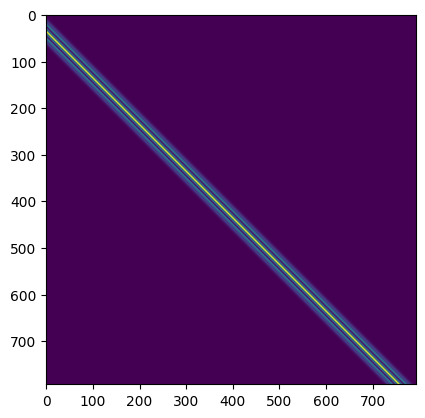

In [ ]:
G2_ = G1[0:793,0:793]
print(G2_.shape)
plt.imshow(G2_)

(793, 1)


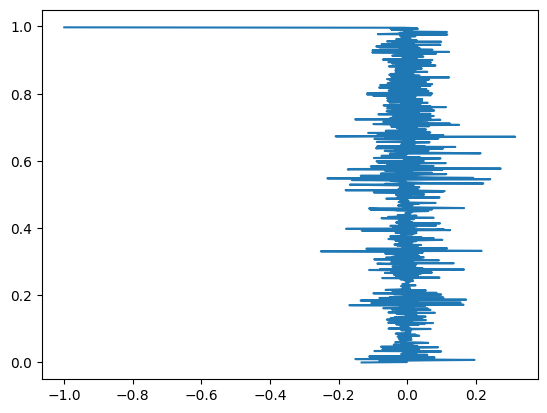

In [ ]:
kr2_ = kr2 [1161:1954]
print(kr2_.shape)
time = np.linspace(0, 1, len(kr2_))
plt.plot(kr2_, time)

In [ ]:
m1_2 = np.dot(G2_, G2_.T)
alfa = 0.3
alfai = np.eye(len(G2_))*alfa
m2_2 = np.linalg.inv(m1_2+alfai)
m3_2 = np.dot(G2_.T, m2_2)

tr_ = tr2_.reshape(len(tr2_),1)


m_2 = np.dot(m3_2, tr_)
print(m_2.shape)

(793, 1)


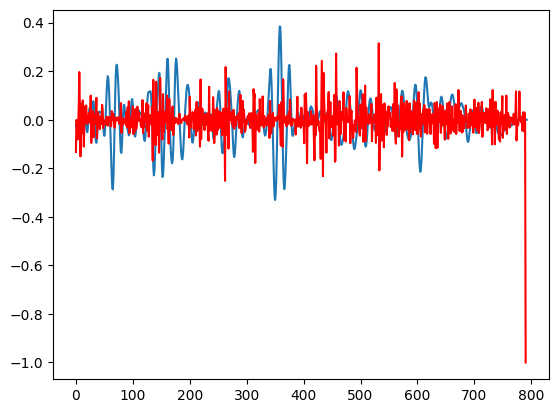

In [ ]:
plt.plot(m_2)
plt.plot(kr2_, '-r')

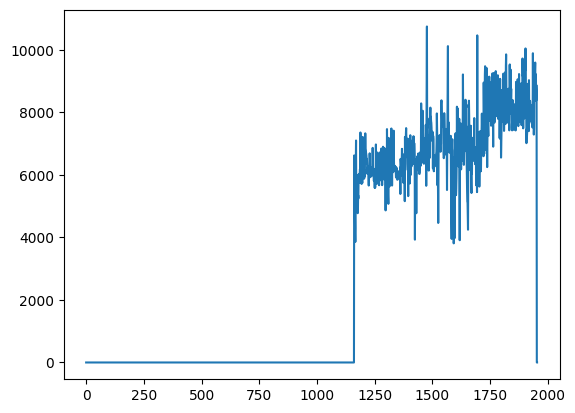

In [ ]:
plt.plot(ai2)

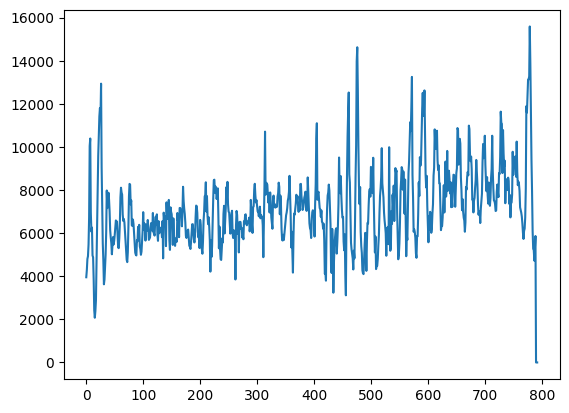

In [ ]:
ai2_ = ai2[1161:1954]
aib2 = np.zeros((len(ai2_),1),float)
for i in range (0, len(ai2_)-1):
  aib2[i] = (ai2_[i+1] - m[i] * ai2_[i+1])/(m[i]+1)

plt.plot(aib2)

/tmp/ipython-input-87-3295073931.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


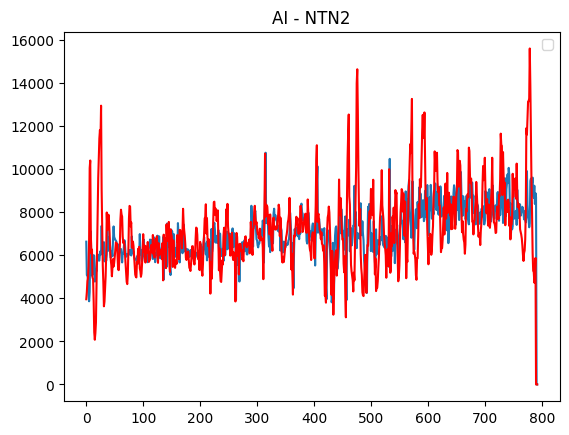

In [ ]:
plt.plot(ai2[1161:1954])
plt.plot(aib2, '-r')
plt.title('AI - NTN2')
plt.legend()

In [ ]:
ai2bmanual = np.savetxt('ai2bmanual.txt', aib2)

(605, 1)
(605, 605)
(605,)
(605, 1)


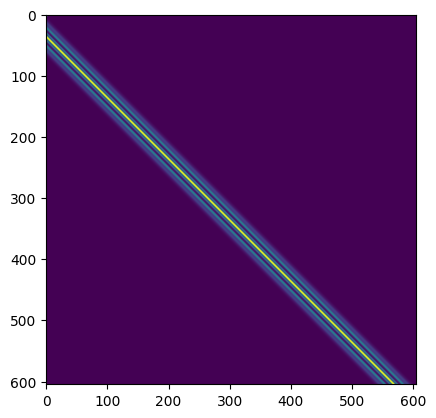

In [ ]:
kr3_ = kr3 [1163:1768]
print(kr3_.shape)
time = np.linspace(0, 1, len(kr3_))
plt.plot(kr3_, time)
###
G3_ = G1[0:605,0:605]
print(G3_.shape)
plt.imshow(G3_)
###
tr3 = np.genfromtxt('/content/seismicnatuna(ntn3).txt')
tr3_ = tr3[0:605]
print(tr3_.shape)
m1_3 = np.dot(G3_, G3_.T)
alfa = 0.3
alfai = np.eye(len(tr3_))*alfa
m2_3 = np.linalg.inv(m1_3+alfai)
m3_3 = np.dot(G3_.T, m2_3)

tr_ = tr3_.reshape(len(tr3_),1)


m_3 = np.dot(m3_3, tr_)
print(m_3.shape)
###


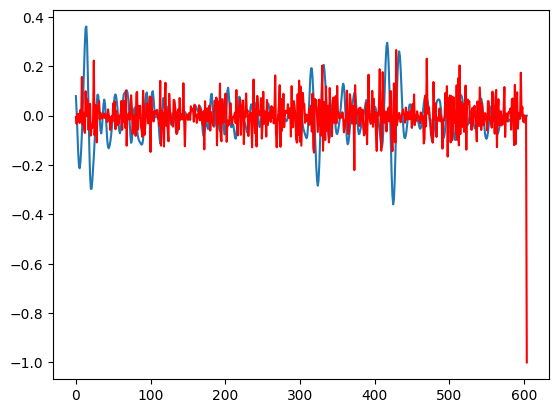

In [ ]:
plt.plot(m_3)
plt.plot(kr3_, '-r')

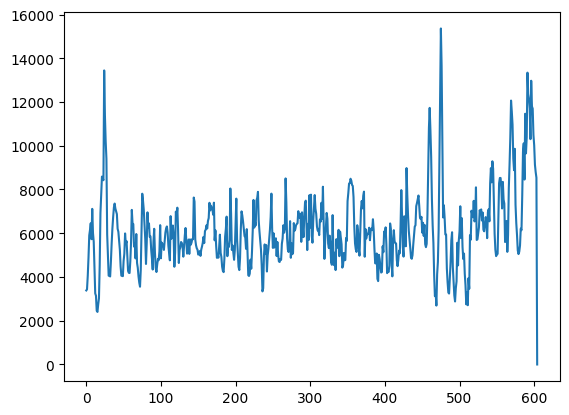

In [ ]:
ai3_ = ai3[1163:1768]
aib3 = np.zeros((len(ai3_),1),float)
for i in range (0, len(ai3_)-1):
  aib3[i] = (ai3_[i+1] - m[i] * ai3_[i+1])/(m[i]+1)

plt.plot(aib3)
# plt.plot(aib2, '-y')
# plt.plot(aib, 'r')

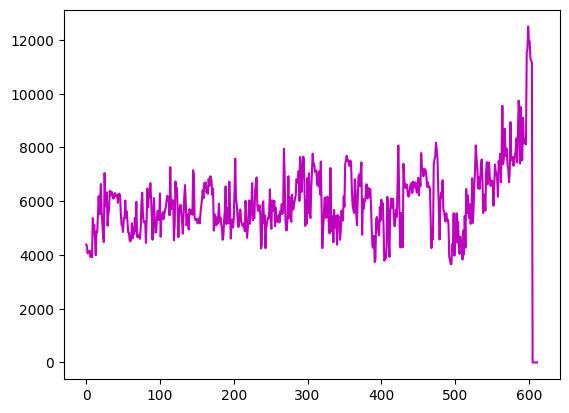

In [ ]:
plt.plot(ai3[1163:1778],'m')

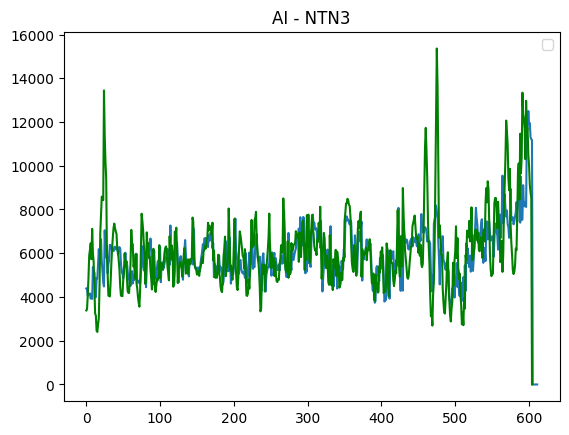

In [ ]:
plt.plot(ai3[1163:1778])
plt.plot(aib3, '-g')
plt.title('AI - NTN3')
plt.legend()

In [ ]:
ai3bmanual = np.savetxt('ai3bmanual.txt', aib3)

(758, 758)
(605, 1)
(758,)
(758, 1)


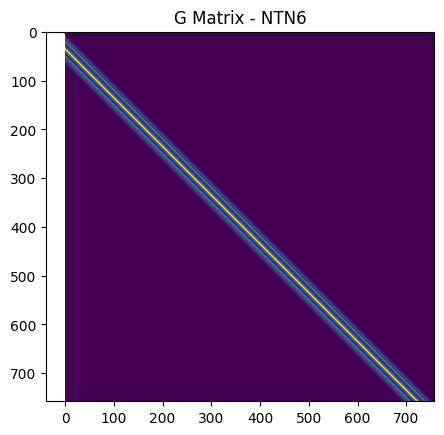

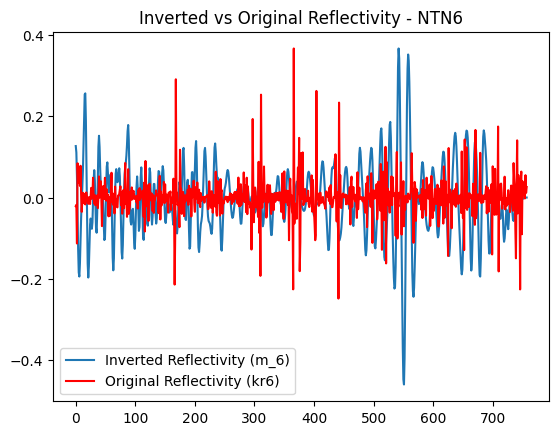

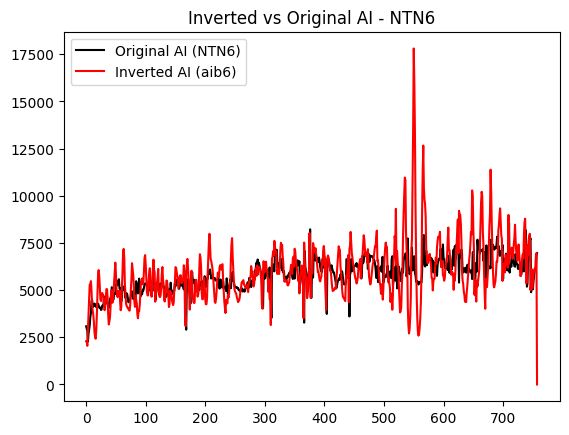

In [ ]:
G6_ = G1[0:758,0:758] # Adjust slicing based on the desired size of G matrix for NTN6
print(G6_.shape)
plt.figure() # Create a new figure for this imshow
plt.imshow(G6_)
plt.title('G Matrix - NTN6') # Add a title
kr6_ = kr6 [775:1533]
print(kr3_.shape)
time = np.linspace(0, 1, len(kr3_))
plt.plot(kr3_, time)

tr6 = np.genfromtxt('/content/seismicnatuna(ntn6).txt') # Make sure this file exists
tr6_ = tr6[0:758] # Adjust slicing based on the desired length of the seismic trace for NTN6
print(tr6_.shape)

m1_6 = np.dot(G6_, G6_.T)
alfa = 0.3
alfai = np.eye(len(G6_))*alfa
m2_6 = np.linalg.inv(m1_6+alfai)
m3_6 = np.dot(G6_.T, m2_6)

tr_ = tr6_.reshape(len(tr6_),1)

m_6 = np.dot(m3_6, tr_)
print(m_6.shape)

plt.figure() # Create a new figure for this plot
plt.plot(m_6, label='Inverted Reflectivity (m_6)')
plt.plot(kr6_, '-r', label='Original Reflectivity (kr6)')
plt.title('Inverted vs Original Reflectivity - NTN6') # Add a title
plt.legend()

ai6_ = ai6[775:1533] # Adjust slicing to match kr6_ and m_6
aib6 = np.zeros((len(ai6_),1),float)
for i in range (0, len(ai6_)-1):
  # Make sure you are using the correct 'm' for this well (m_6)
  # and the correct 'ai' (ai6_)
  aib6[i] = (ai6_[i+1] - m_6[i] * ai6_[i+1])/(m_6[i]+1)

plt.figure() # Create a new figure for this plot
plt.plot(ai6[775:1533],'-k', label='Original AI (NTN6)') # Adjust slicing
plt.plot(aib6, '-r', label='Inverted AI (aib6)')
plt.title('Inverted vs Original AI - NTN6') # Add a title
plt.legend()

plt.show() # Display all generated plots



In [ ]:
ai6bmanual = np.savetxt('ai6bmanual.txt', aib6)